# Customers send back a substantial part of the products that they purchase online. Return shipping is expensive for online platforms and return orders are said to reach 50% for certain industries and products. Nevertheless, free or inexpensive return shipping has become a customer expectation and de-facto standard in the fierce online competition on clothing, but shops have indirect ways to influence customer purchase behavior. For purchases where return seems likely, a shop could, for example, restrict payment options or display additional marketing communication.

Plan Of Attack

Before we get into the process, I will give you a brief on what kind of steps we will get.

- Gather the data
- Pre-process the data
- Explore the data
- Interpret the result

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TrainingData.csv to TrainingData (1).csv


In [3]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['TrainingData.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df1.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1


In [5]:
from google.colab import files
uploaded = files.upload()

Saving TestingData.csv to TestingData (1).csv


In [6]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['TestingData.csv']))
# Dataset is now stored in a Pandas Dataframe

In [7]:
df2.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date
0,26,6/23/2016,6/26/2016,92,xl,turquoise,42,69.90,9392,Mrs,4/14/1962,1010,3/24/2016
1,28,6/23/2016,7/2/2016,2,xxl,green,2,19.90,9392,Mrs,4/14/1962,1010,3/24/2016
2,37,6/23/2016,6/26/2016,895,38,white,39,39.95,30826,Mrs,4/27/1964,1001,2/17/2015
3,56,6/23/2016,NaN,5,l,white,5,69.90,30828,Mrs,5/13/1966,1008,1/21/2016
4,65,6/23/2016,NaN,55,40,purple,1,89.90,22948,Mrs,3/11/1957,1001,2/17/2015


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  79945 non-null  int64  
 1   order_date     79945 non-null  object 
 2   delivery_date  72509 non-null  object 
 3   item_id        79945 non-null  int64  
 4   item_size      79945 non-null  object 
 5   item_color     79945 non-null  object 
 6   brand_id       79945 non-null  int64  
 7   item_price     79945 non-null  float64
 8   user_id        79945 non-null  int64  
 9   user_title     79945 non-null  object 
 10  user_dob       72956 non-null  object 
 11  user_state     79945 non-null  int64  
 12  user_reg_date  79945 non-null  object 
 13  return         79945 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 8.5+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20055 entries, 0 to 20054
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  20055 non-null  int64  
 1   order_date     20055 non-null  object 
 2   delivery_date  18173 non-null  object 
 3   item_id        20055 non-null  int64  
 4   item_size      20055 non-null  object 
 5   item_color     20055 non-null  object 
 6   brand_id       20055 non-null  int64  
 7   item_price     20055 non-null  float64
 8   user_id        20055 non-null  int64  
 9   user_title     20055 non-null  object 
 10  user_dob       18319 non-null  object 
 11  user_state     20055 non-null  int64  
 12  user_reg_date  20055 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 2.0+ MB


In [10]:
# Checking Null values in Train Set
df1.isnull().sum()

order_item_id       0
order_date          0
delivery_date    7436
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_title          0
user_dob         6989
user_state          0
user_reg_date       0
return              0
dtype: int64

In [11]:

# Checking Null values in Test Set
df2.isnull().sum()

order_item_id       0
order_date          0
delivery_date    1882
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_title          0
user_dob         1736
user_state          0
user_reg_date       0
dtype: int64

In [12]:
df1 = df1.dropna()

In [13]:
df2 = df2.dropna()

In [14]:
df1.isnull().sum()

order_item_id    0
order_date       0
delivery_date    0
item_id          0
item_size        0
item_color       0
brand_id         0
item_price       0
user_id          0
user_title       0
user_dob         0
user_state       0
user_reg_date    0
return           0
dtype: int64

In [15]:
df1.isnull().sum()

order_item_id    0
order_date       0
delivery_date    0
item_id          0
item_size        0
item_color       0
brand_id         0
item_price       0
user_id          0
user_title       0
user_dob         0
user_state       0
user_reg_date    0
return           0
dtype: int64

In [16]:
df1['item_color'].value_counts()
import numpy as np

print('Item_Type:\n',df1['item_color'].value_counts())

Item_Type:
 black       12416
blue         6996
grey         5859
brown        5772
red          4721
            ...  
ebony           4
creme           3
avocado         3
amethyst        2
opal            2
Name: item_color, Length: 77, dtype: int64


Mainly Black,Blur,grey,brown red and high value items 

Text(0, 0.5, 'Frequency')

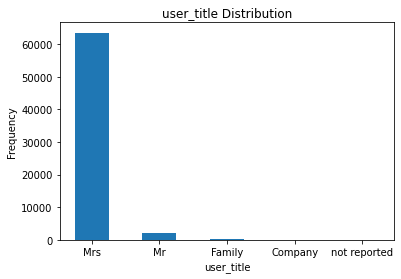

In [17]:
df1['user_title'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['user_title'].value_counts().index, df1['user_title'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('user_title Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('user_title')
plt.ylabel('Frequency')


In [18]:
df2['item_color'].value_counts()
import numpy as np

print('Item_Type:\n',df2['item_color'].value_counts())

Item_Type:
 black           3106
blue            1759
grey            1464
brown           1424
red             1187
                ... 
curled             1
copper coin        1
gold               1
creme              1
antique pink       1
Name: item_color, Length: 73, dtype: int64


Text(0, 0.5, 'Frequency')

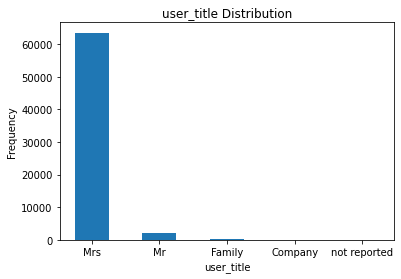

In [19]:
df2['user_title'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['user_title'].value_counts().index, df1['user_title'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('user_title Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('user_title')
plt.ylabel('Frequency')

In [20]:
df1['item_size'].value_counts()
import numpy as np

print('item_size:\n',df1['item_size'].value_counts())

item_size:
 l       8214
xl      7398
m       6939
xxl     6217
40      5051
        ... 
80         1
3834       1
3132       1
84         1
4034       1
Name: item_size, Length: 100, dtype: int64


In [21]:
df2['item_size'].value_counts()
import numpy as np

print('item_size:\n',df1['item_size'].value_counts())

item_size:
 l       8214
xl      7398
m       6939
xxl     6217
40      5051
        ... 
80         1
3834       1
3132       1
84         1
4034       1
Name: item_size, Length: 100, dtype: int64


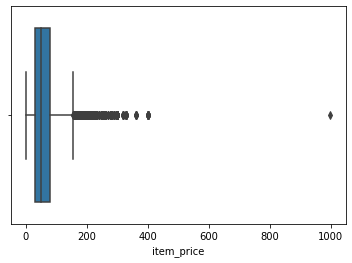

In [22]:
import seaborn as sns
sns.boxplot(x='item_price',data=df1)

Most of the items price is less than 100 in training dataset




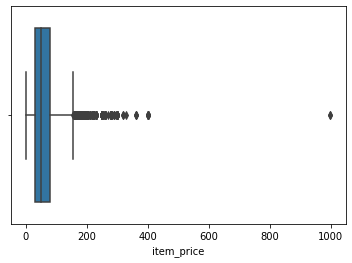

In [23]:
import seaborn as sns
sns.boxplot(x='item_price',data=df2)

Most of the items price is less than 100 in test dataset

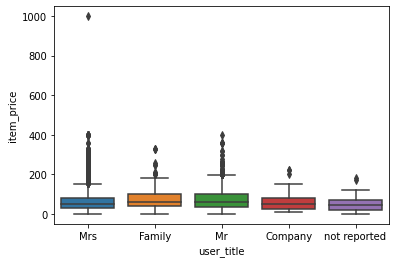

In [24]:
import seaborn as sns
sns.boxplot(y='item_price',x="user_title",data=df1)

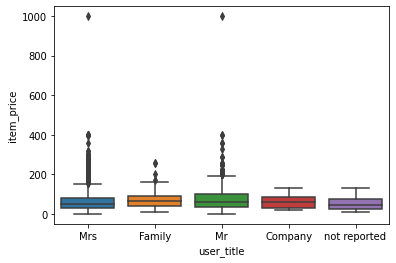

In [25]:
import seaborn as sns
sns.boxplot(y='item_price',x="user_title",data=df2)

It has been observed that User tile Mr abd Family are spending more

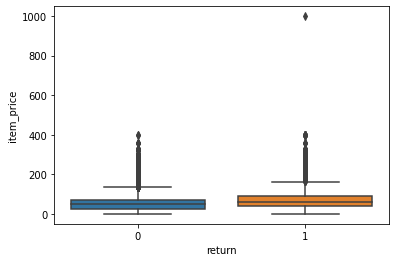

In [26]:
import seaborn as sns
sns.boxplot(y='item_price',x="return",data=df1)

Items with Higher Price are getting more returns

In [27]:
import pandas as pd
import numpy as np
import datetime

In [28]:
df1['year'] = pd.DatetimeIndex(df1['user_dob']).year
df1.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,year
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0,1969
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1,1970
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0,1970
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0,1960
5,45,23-06-2016,26-06-2016,448,42,bordeaux,72,59.9,30828,Mrs,13-05-1966,1008,21-01-2016,1,1966


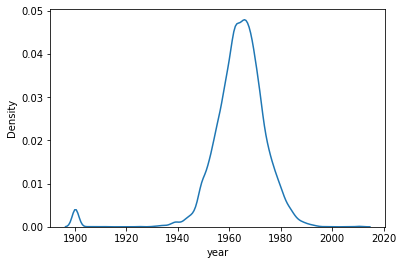

In [29]:
sns.kdeplot(data=df1, x="year")


In [30]:
df2['year'] = pd.DatetimeIndex(df2['user_dob']).year
df2.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,year
0,26,6/23/2016,6/26/2016,92,xl,turquoise,42,69.90,9392,Mrs,4/14/1962,1010,3/24/2016,1962
1,28,6/23/2016,7/2/2016,2,xxl,green,2,19.90,9392,Mrs,4/14/1962,1010,3/24/2016,1962
2,37,6/23/2016,6/26/2016,895,38,white,39,39.95,30826,Mrs,4/27/1964,1001,2/17/2015,1964
5,80,6/23/2016,6/26/2016,57,l,purple,3,24.90,16075,Mrs,11/3/1969,1003,11/22/2015,1969
6,95,6/23/2016,6/26/2016,57,xl,olive,3,34.90,17124,Mrs,3/3/1949,1015,8/2/2015,1949


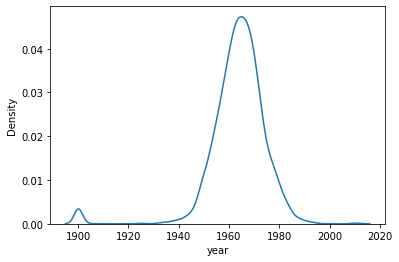

In [31]:
sns.kdeplot(data=df2, x="year")

As it can be observed the age data is quite normally distributed with some exceptions. This can be people who intentionally did not wanted to share this information. Later we can modify this field and exclude such values, or replace them with some logical ones

Next it will be interesting to see if there is some seasonality in the returns.

In [32]:
df1['month'] = pd.DatetimeIndex(df1['user_dob']).month
df1.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,year,month
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0,1969,4
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1,1970,4
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0,1970,4
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0,1960,9
5,45,23-06-2016,26-06-2016,448,42,bordeaux,72,59.9,30828,Mrs,13-05-1966,1008,21-01-2016,1,1966,5


In [33]:
df2['month'] = pd.DatetimeIndex(df2['user_dob']).month
df2.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,year,month
0,26,6/23/2016,6/26/2016,92,xl,turquoise,42,69.90,9392,Mrs,4/14/1962,1010,3/24/2016,1962,4
1,28,6/23/2016,7/2/2016,2,xxl,green,2,19.90,9392,Mrs,4/14/1962,1010,3/24/2016,1962,4
2,37,6/23/2016,6/26/2016,895,38,white,39,39.95,30826,Mrs,4/27/1964,1001,2/17/2015,1964,4
5,80,6/23/2016,6/26/2016,57,l,purple,3,24.90,16075,Mrs,11/3/1969,1003,11/22/2015,1969,11
6,95,6/23/2016,6/26/2016,57,xl,olive,3,34.90,17124,Mrs,3/3/1949,1015,8/2/2015,1949,3


In [34]:
import csv
import os
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from math import sqrt
import pandas as pd

In [35]:
df1.dtypes

order_item_id      int64
order_date        object
delivery_date     object
item_id            int64
item_size         object
item_color        object
brand_id           int64
item_price       float64
user_id            int64
user_title        object
user_dob          object
user_state         int64
user_reg_date     object
return             int64
year               int64
month              int64
dtype: object

In [36]:
df2.dtypes

order_item_id      int64
order_date        object
delivery_date     object
item_id            int64
item_size         object
item_color        object
brand_id           int64
item_price       float64
user_id            int64
user_title        object
user_dob          object
user_state         int64
user_reg_date     object
year               int64
month              int64
dtype: object

In [37]:

lb_make = LabelEncoder()
df1['item_size'] = lb_make.fit_transform(df1['item_size'])
df1['item_color'] = lb_make.fit_transform(df1['item_color'])
df1['user_title'] = lb_make.fit_transform(df1['user_title'])


In [38]:

df2['item_size'] = lb_make.fit_transform(df2['item_size'])
df2['item_color'] = lb_make.fit_transform(df2['item_color'])
df2['user_title'] = lb_make.fit_transform(df2['user_title'])

In [39]:
df1.dtypes

order_item_id      int64
order_date        object
delivery_date     object
item_id            int64
item_size          int64
item_color         int64
brand_id           int64
item_price       float64
user_id            int64
user_title         int64
user_dob          object
user_state         int64
user_reg_date     object
return             int64
year               int64
month              int64
dtype: object

In [40]:
df1.drop(['order_date', 'delivery_date','user_reg_date','order_item_id','user_dob','year','month','user_id'], axis = 1,inplace=True)

In [41]:
df1.head()

,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,return
0,643,48,60,30,49.9,3,1013,0
1,195,98,47,46,19.9,3,1001,1
2,25,98,47,5,79.9,3,1001,0
3,173,93,22,20,19.9,3,1013,0
5,448,62,21,72,59.9,3,1008,1


In [42]:
df2.drop(['order_date', 'delivery_date','user_reg_date','order_item_id','user_dob','year','month','user_id'], axis = 1,inplace=True)

In [43]:
df2.head()

,item_id,item_size,item_color,brand_id,item_price,user_title,user_state
0,92,88,70,42,69.90,3,1010
1,2,90,44,2,19.90,3,1010
2,895,43,71,39,39.95,3,1001
5,57,84,65,3,24.90,3,1003
6,57,88,60,3,34.90,3,1015


In [46]:
df1.dtypes

item_id         int64
item_size       int64
item_color      int64
brand_id        int64
item_price    float64
user_title      int64
user_state      int64
return          int64
dtype: object

In [47]:
df2.dtypes

item_id         int64
item_size       int64
item_color      int64
brand_id        int64
item_price    float64
user_title      int64
user_state      int64
dtype: object

In [48]:
x=df1.drop(['return'],axis=1)
y=df1['return']
x_test=df2

In [49]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

x_test=sc_x.fit_transform(x_test)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [69]:
x_train

array([[ 1.18515959, -0.74171034, -0.82307752, ...,  2.80410939,
         0.18180362, -1.23476495],
       [-1.20797371, -1.10770615, -0.82307752, ...,  0.09328349,
         0.18180362, -0.06702645],
       [-0.09127325, -1.10770615, -0.73332476, ...,  0.30180856,
         0.18180362, -0.53412185],
       ...,
       [ 0.8286141 ,  0.72227293,  0.38858474, ..., -0.80337431,
         0.18180362, -0.06702645],
       [-1.05394606,  0.72227293, -0.1948082 , ..., -0.63655426,
         0.18180362, -0.76766955],
       [ 1.0810483 , -1.10770615,  1.37586509, ...,  1.76148405,
         0.18180362,  0.63361666]])

In [70]:
y_train

17425    1
10708    1
4388     1
63833    0
6434     0
        ..
45188    1
7688     1
66511    0
1101     0
19119    0
Name: return, Length: 59545, dtype: int64

In [71]:
x_test

array([[ 0.34941697, -1.10770615, -0.91283028, ...,  0.7188587 ,
         0.18180362, -0.06702645],
       [ 0.99975593, -0.92470825,  0.34370836, ..., -0.53229172,
         0.18180362, -0.06702645],
       [ 1.18515959, -0.92470825, -0.77820114, ...,  2.80410939,
         0.18180362, -1.46831266],
       ...,
       [ 0.74019082,  0.76802241, -1.04745942, ..., -0.53229172,
         0.18180362, -1.23476495],
       [ 1.11812903, -0.92470825, -0.91283028, ...,  1.55295898,
         0.18180362,  0.63361666],
       [-1.00830824, -0.74171034, -0.82307752, ..., -0.74081679,
         0.18180362,  0.63361666]])

Applying PCA

In [73]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_

Classification Algorithms

Logistic Regression

In [74]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [76]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.5410306785552366


In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [79]:
cm

array([[1763, 1536],
       [1501, 1817]])

K-NN

In [83]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [86]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [88]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.5195708024784645


In [89]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1690 1609]
 [1570 1748]]


SVM

In [95]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [97]:
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [98]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVM is:  0.5371014054707571


In [99]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2124 1175]
 [1888 1430]]


Decision Tree Classification

In [100]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [101]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [102]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree Classifier is:  0.5174550400483603


In [103]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1820 1479]
 [1714 1604]]


Random Forest Classification

In [104]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [105]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [106]:

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Random Forest Classification is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest Classification is:  0.523500075562944


In [107]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1841 1458]
 [1695 1623]]


Results

The accuracy of Logistic Regression is: 54.1 %

The accuracy of KNN is: 51.95 %

The accuracy of SVM is: 53.71 %

The accuracy of Decision Tree Classifier is: 51.74 %

The accuracy of Random Forest Classification is: 52.35 %